# Project 3: 

## Extract feature values
Fashion MNIST dataset is downloaded and processed(by normalization) into training and validation sets.

In [808]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [809]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
#print(x_test.shape)
x_train = np.reshape(x_train,newshape = (60000, 784))
x_test = np.reshape(x_test,newshape = (10000, 784))
#print(x_train.shape)
x_train=x_train/255.0
x_test=x_test/255.0

## K-Mean clustering
Clustering is the process of grouping the datapoints into a number of groups called Clusters such that data points in same group are similar to each other. This determines intrinsic grouping among unlabeled dataset. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.
The k-means algorithm divides a set of samples into disjoint clusters, each described by the mean of the samples in the cluster. The means are commonly called the cluster centroids; note that they are not, in general, points from set of samples, although they live in the same space.

In Fashion MNIST dataset, we have dataset grouped into 10 clusters. This project clusters the data with ~50.02% accuracy.

In [810]:
n_clusters = len(np.unique(y_train))
kmodel = KMeans(n_clusters= n_clusters, random_state=4)
#print(n_clusters)

In [811]:
#fit the k-mean algorithm with triaining data
kmodel.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=4, tol=0.0001, verbose=0)

In [812]:
#predict the clustering in test data
y_pred=kmodel.predict(x_test)

In [813]:
#calcuate the accuracy
print('Accuracy: {}'.format(metrics.adjusted_mutual_info_score(y_test, y_pred)*100))

Accuracy: 50.00293408678331


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


## Auto Encoder
"Autoencoding" is a data compression algorithm where the compression and decompression functions are data-specificc, lossy, and learned automatically from examples rather than engineered by any human. 
Clustering is difficult to do in high dimensions because the distance between most pairs of points is similar. An autoencoder lets us re-represent high dimensional points in a lower-dimensional space called as 'latent space'. We use this reduced dimensional representation for clustering.

Autoencoder is built below:

In [814]:
from keras.layers import Input, Dense
from keras.models import Model

#specify encoded dimensions
encoding_dimensions =32

input_img = Input(shape=(784,))
#Create layers for deep neural network having 4 dense layers
#for encoding and 4 dense layers for decoding
encoded=Dense(256, activation='relu')(input_img)
encoded= Dense(128, activation='relu')(encoded)
encoded= Dense(64, activation='relu')(encoded)
encoded =Dense(encoding_dimensions, activation='relu')(encoded)

decoded =Dense(64, activation='relu')(encoded)
decoded= Dense(128, activation='relu')(decoded)
decoded=Dense(256, activation='relu')(decoded)
decoded=Dense(784, activation='sigmoid')(decoded)

#create autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_75 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_348 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_349 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_350 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_351 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_352 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_353 (Dense)            (None, 128)               8320      
__________

In [815]:
#encoder model
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_75 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_348 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_349 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_350 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_351 (Dense)            (None, 32)                2080      
Total params: 244,192
Trainable params: 244,192
Non-trainable params: 0
_________________________________________________________________


In [816]:
# # create a placeholder for an encoded (32-dimensional) input
# encoded_input = Input(shape=(encoding_dimensions,))
# # retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-4](encoded_input)
# decoder_layer = autoencoder.layers[-3](decoder_layer)
# decoder_layer = autoencoder.layers[-2](decoder_layer)

# decoder_layer = autoencoder.layers[-1](decoder_layer)
# # create the decoder model
# decoder = Model(encoded_input, decoder_layer)

In [817]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [818]:
model_fit_history=autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 30s 500us/step - loss: 0.3772 - val_loss: 0.3187
Epoch 2/50
60000/60000 [==============================] - 18s 293us/step - loss: 0.3092 - val_loss: 0.3055
Epoch 3/50
60000/60000 [==============================] - 20s 333us/step - loss: 0.3002 - val_loss: 0.2991
Epoch 4/50
60000/60000 [==============================] - 16s 270us/step - loss: 0.2954 - val_loss: 0.2960
Epoch 5/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.2921 - val_loss: 0.2931
Epoch 6/50
60000/60000 [==============================] - 18s 299us/step - loss: 0.2899 - val_loss: 0.2910
Epoch 7/50
60000/60000 [==============================] - 22s 368us/step - loss: 0.2883 - val_loss: 0.2902
Epoch 8/50
60000/60000 [==============================] - 20s 332us/step - loss: 0.2866 - val_loss: 0.2882
Epoch 9/50
60000/60000 [==============================] - 17s 290us/step - loss: 0.2853 - val_

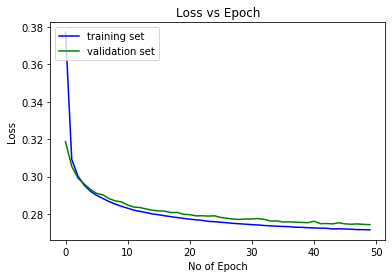

In [819]:
#Plot loss results for training data and testing data 
plt.plot(model_fit_history.history['loss'], 'b')
plt.plot(model_fit_history.history['val_loss'], 'g')
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('No of Epoch')
plt.legend(['training set', 'validation set'], loc='upper left')

## K-Mean Clustering with Autoencoder NN layer

In [820]:
#encoded inputs
encoded_imgs_train = encoder.predict(x_train)
decoded_imgs_train = autoencoder.predict(x_train)
encoded_imgs_test = encoder.predict(x_test)
decoded_imgs_test = autoencoder.predict(x_test)

In [821]:
#create k means model with encoded inputs
model = KMeans(n_clusters = n_clusters, random_state=23)
model.fit(encoded_imgs_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [828]:
y_prediction = model.predict(encoded_imgs_test)

In [830]:
print("Accuracy: {:.2f}".format(metrics.normalized_mutual_info_score(y_test, y_prediction)*100))

Accuracy: 44.39


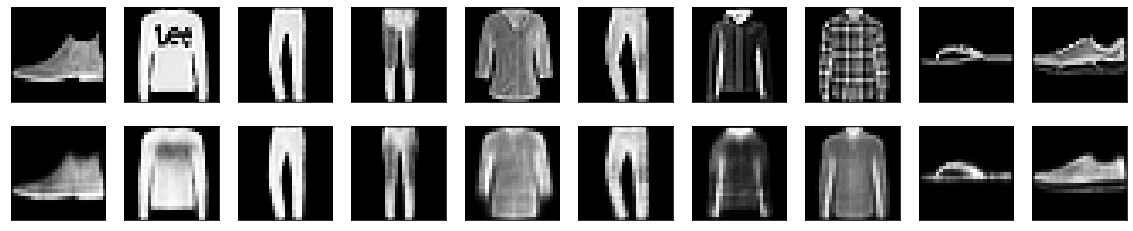

In [831]:
#visualization of input data 
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Given inputs
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #reconstructioned training data
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

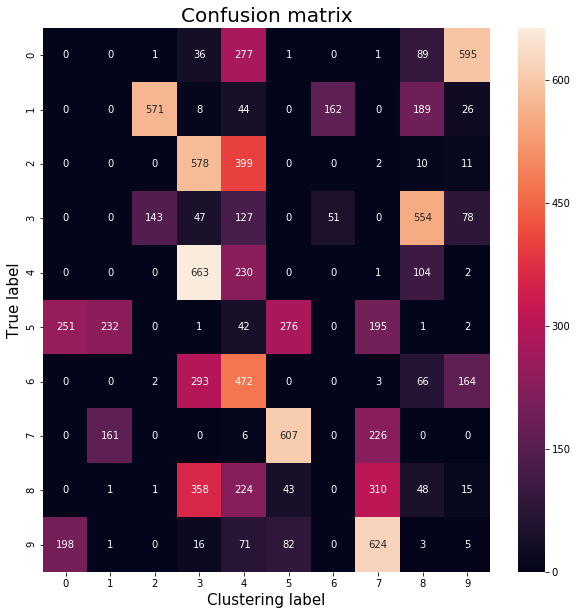

In [832]:
cm = confusion_matrix(y_test, y_prediction)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

# Clustering using Gaussian Mixture Matrix
A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data. A GaussianMixture.Fit method is provided that learns a Gaussian Mixture Model from train data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the GaussianMixture.predict method.

In [833]:
from sklearn.mixture import GaussianMixture as GMM
model2 = GMM(n_components=n_clusters)
model_fit_history2=model2.fit(encoded_imgs_train)

In [834]:
y_prediction2 = model2.predict(encoded_imgs_test)
print("Accuracy: {}".format(metrics.normalized_mutual_info_score(y_test, y_prediction2)*100))

Accuracy: 63.00922639675489


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


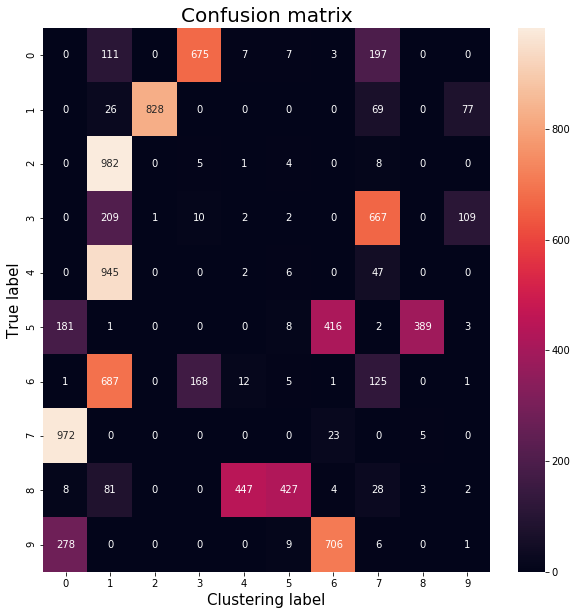

In [835]:
cm = confusion_matrix(y_test, y_prediction2)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()